<center> <h1>
Análisis de ciencia de datos (TC-2004B)
<h4>
<center>César Guillermo Vázquez Alvarez A01197857
<center>IDM - Ingeniería de Ciencia de Datos y Matemáticas

# Aprendizaje Supervisado: Clasificadores (Diabetes)

## Fase 1. Exploración de los datos



In [1]:
# Quitar Warnings.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
# Importar librerias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar los datos
diabetes = pd.read_csv('diabetes.csv')

In [4]:
# Observar columnas en el conjunto de datos
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

In [5]:
# Examinar los datos
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Encontrar dimensiones del conjunto de datos
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [7]:
# Identificar el número de personas clasificadas con diabetes y sin diabetes. 1: con diabetes, 0: sin diabetes

diabetes.groupby('Diabetes').size()

Diabetes
0    500
1    268
dtype: int64

Diabetes
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

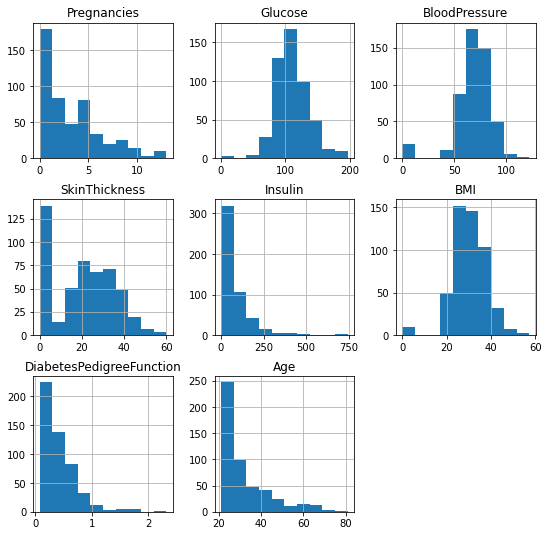

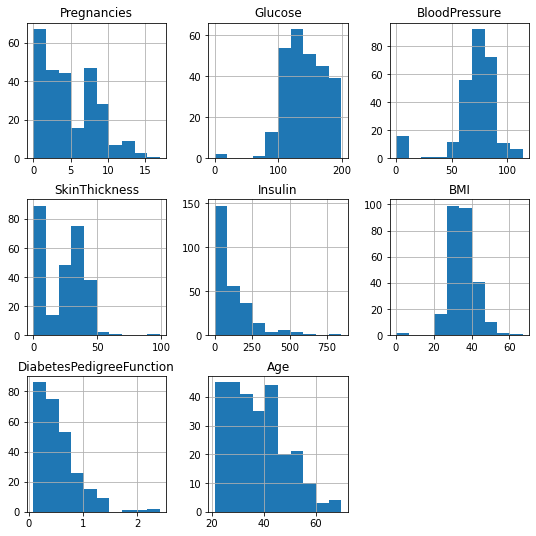

In [8]:
# Visualización de los datos
diabetes.groupby('Diabetes').hist(figsize=(9, 9))

## Fase 2. Limpieza de los datos



In [9]:
# Encontrar datos faltantes
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [10]:
# Encontrar datos nulos
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [11]:
# Encontrar valores atípicos según el histograma de 'BloodPreassure'

print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Diabetes')['Age'].count())

Total :  35
Diabetes
0    19
1    16
Name: Age, dtype: int64


In [12]:
# Encontrar valores atípicos según el histograma de 'Glucose'
print("Total : ", diabetes[diabetes.Glucose == 0].shape[0])
print(diabetes[diabetes.Glucose == 0].groupby('Diabetes')['Age'].count())

Total :  5
Diabetes
0    3
1    2
Name: Age, dtype: int64


In [13]:
# Encontrar valores atípicos según el histograma de 'SkinThickness'
print("Total : ", diabetes[diabetes.SkinThickness == 0].shape[0])
print(diabetes[diabetes.SkinThickness == 0].groupby('Diabetes')['Age'].count())

Total :  227
Diabetes
0    139
1     88
Name: Age, dtype: int64


In [14]:
# Encontrar valores atípicos según el histograma de 'BMI'
print("Total : ", diabetes[diabetes.BMI == 0].shape[0])
print(diabetes[diabetes.BMI == 0].groupby('Diabetes')['Age'].count())

Total :  11
Diabetes
0    9
1    2
Name: Age, dtype: int64


In [15]:
# Encontrar valores atípicos según el histograma de 'Insulin'
print("Total : ", diabetes[diabetes.Insulin == 0].shape[0])
print(diabetes[diabetes.Insulin == 0].groupby('Diabetes')['Age'].count())

Total :  374
Diabetes
0    236
1    138
Name: Age, dtype: int64


In [16]:
# Remover las filas que tengan cero en 'BloodPreassure', 'BMI' y 'Glucose'
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


## Fase 3. Ingeniería de características



In [17]:
# Separar el conjunto de datos en características (X) y la respuesta a predecir (y)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Diabetes

## Fase 4. Selección del modelo



In [18]:
# Importar librerias y clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# Iniciar los clasificadores con sus parámetros determinados y añadir cada uno a la lista de modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [20]:
# Importar librerias para train/test split y k-fold cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score # Para evaluar la precisión del modelo en el método train/test split

In [21]:
# Separar las características y respuesta
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Diabetes, random_state=0)

In [22]:
# Ajustar cada modelo en un bucle y calcular la precisión del modelo respectivo usando el "accuracy_score".
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.762431
3   DT  0.740331
4  GNB  0.734807
5   RF  0.745856
6   GB  0.773481


In [23]:
# Entrenar los modelos con 10 folds y calcular el promedio de la precisión 
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10) # kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean() 
        # Proporciona su propia interfaz de entrenamiento y cálculo de precisión

    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.719787
1  SVC  0.758581
2   LR  0.765278
3   DT  0.689269
4  GNB  0.757021
5   RF  0.773649
6   GB  0.772279


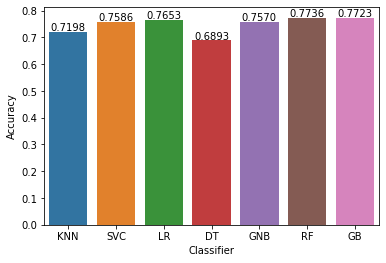

In [24]:
# Graficar las puntuaciones de precisión
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Aplicación del modelo de redes neuronales

Construiremos un modelo de red neuronal usando la libreria scikit-learn.

In [25]:
# Importamos 'MLPClassifier'
from sklearn.neural_network import MLPClassifier

In [26]:
# Crear una instancia del modelo establecida en tres capas.
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
# Se selecciona 'relu' como la función de activación 
    # ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# Se selecciona 'adam' como solucionador para la optimización del peso
    # ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

In [27]:
# Ajustar el modelo a los datos de entrenamiento     
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [28]:
# Generar predicciones sobre el conjunto de datos de entrenamiento y prueba
predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [29]:
# Evaluación del rendimiento
# Importar módulos
from sklearn.metrics import classification_report,confusion_matrix

# Imprimir matriz de confusión y los resultados del informe de confusión sobre los datos de entrenamiento
print('Entrenamiento:')
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

# Imprimir matriz de confusión y los resultados del informe de confusión sobre los datos de prueba
print('Prueba:')
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

Entrenamiento:
[[309  47]
 [ 89  98]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       356
           1       0.68      0.52      0.59       187

    accuracy                           0.75       543
   macro avg       0.73      0.70      0.70       543
weighted avg       0.74      0.75      0.74       543

Prueba:
[[95 24]
 [30 32]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       119
           1       0.57      0.52      0.54        62

    accuracy                           0.70       181
   macro avg       0.67      0.66      0.66       181
weighted avg       0.70      0.70      0.70       181



## Preguntas

**¿Qué aspectos se revisaron para la preparación de datos?**

Primero se observaron los datos, despues se realizo una limpeza de los datos nulos y columnas que no heran necesarias para modelo.


**¿Qué cambios se hicieron?**

Se eliminaron los datos que no necesitabamos de la dataframe para despues utilizarlos en el modelo.


**¿Qué modelos de aprendizaje se probaron?**

Utilice un modelo Multi-layer Perceptron classifier con una función de activación relu y solucionador adam.


**Compara el resultado de todos los modelos. ¿Cuál es mejor?**

Por la naturaleza de los datos las redes neuronales son la mejor opción en este caso las "Multi-layer Perceptron classifier" probe otros activadores y solucionadores y los mejores si són relu y adam respectivamente.


## Conclusión

Me encantó ver el uso de las redes neuronales en la clase, y creo que como estudiante ha sido un gran beneficio aprender sobre estos complejos algoritmos. La capacidad de reconocer rápidamente patrones y sugerir conexiones entre ellos ha sido especialmente útil a la hora de estudiar para los exámenes y las tareas. También el poder aplicarlos estas redes neuronales en nuestras propias necesidades de un futuro en diferentes áreas de estudia, lo que ha sido emocionante y gratificante. Me encantaría aprender más sobre las redes neuronales y verlas utilizadas en más clases en el futuro.

La verdad el poder hacer este tipo de actividades me enriquecen en mi desarrollo tanto académico como laboral, y me siento muy comodo trabajando en estas actividades por que aprendo y pongo en practica lo visto en clase.

# Visualización de árboles de Decisión

Apartir de dós metodos diferentes visualizaremos el árbol de predicción de cáncer:

- Representar el árbol de decisión en texto impreso

- Visualizar árbol de decisión con graphviz

## Representar el árbol de decisión en texto impreso

In [ ]:
# Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
algoritmo = DecisionTreeClassifier(criterion = 'entropy')

# Entrenar el modelo
algoritmo.fit(X_train, y_train)

# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [ ]:
# Importar librerias
#from sklearn.tree import export_text
from sklearn import tree


# Representar árbol de decisión en texto impreso
text_representation = tree.export_text(algoritmo)
print(text_representation)

## Visualizar árbol de decisión con graphviz

In [ ]:
# Importar libreria
import graphviz

# Exportar a DOT data
dot_data = tree.export_graphviz(algoritmo, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
display(graph)

# Guardar imagen del árbol de decisión en png
graph.render("decision_tree_graphivz")